<a href="https://colab.research.google.com/github/ZioGuillo/python_codes/blob/main/Finance_Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program attempts to optimize a users portfolio using the Efficient Frontier & Python.

In [1]:
# Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [47]:
assets =  ["FB", "AMZN", "AAPL", "NFLX", "NIO", "SPY", "TSLA", "QQQ", "SQQQ", "SNAP", "WM", "JNJ", "UNH", "LMT", "NVDA"]

In [48]:
# Assign weights to the stocks. Weights must = 1 so 0.2 for each

weights = np.array([0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667])
weights

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [49]:
#Get the stock starting date
stockStartDate = '2013-01-01'
# Get the stocks ending date aka todays date and format it in the form YYYY-MM-DD
today = datetime.today().strftime('%Y-%m-%d')

In [50]:
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()
#Store the adjusted close price of stock into the data frame
for stock in assets:
   df[stock] = web.DataReader(stock,data_source='yahoo',start=stockStartDate , end=today)['Adj Close']

df

,FB,AMZN,AAPL,NFLX,NIO,SPY,TSLA,QQQ,SQQQ,SNAP,WM,JNJ,UNH,LMT,NVDA
Date,,,,,,,,,,,,,,,
2013-01-02,28.000000,257.309998,16.926661,13.144286,NaN,125.451904,7.072000,62.185093,11275.864258,NaN,27.778475,57.166523,47.993988,73.726242,11.773857
2013-01-03,27.770000,258.480011,16.713015,13.798572,NaN,125.168480,6.954000,61.861229,11444.892578,NaN,27.876596,57.085827,45.750046,73.947571,11.783113
2013-01-04,28.760000,259.149994,16.247477,13.711429,NaN,125.718124,6.880000,61.657635,11558.604492,NaN,27.868420,57.739479,45.838043,74.224213,12.171872
2013-01-07,29.420000,268.459991,16.151909,14.171429,NaN,125.374611,6.868000,61.676151,11537.091797,NaN,27.778475,57.618446,45.838043,74.477196,11.820140
2013-01-08,29.059999,266.380005,16.195379,13.880000,NaN,125.013870,6.736000,61.555851,11601.630859,NaN,27.835712,57.626511,45.230862,73.481194,11.560966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-05,294.679993,3322.000000,118.824997,513.760010,42.349998,350.239990,438.089996,294.390015,18.900000,41.549999,119.690002,139.759995,354.399994,364.700012,566.400024
2020-11-06,293.410004,3311.370117,118.690002,514.729980,41.630001,350.160004,429.950012,294.609985,18.830000,45.380001,119.279999,142.250000,347.459991,361.269989,582.479980
2020-11-09,278.769989,3143.739990,116.320000,470.500000,44.020000,354.559998,421.260010,288.589996,19.980000,41.099998,120.959999,146.080002,350.000000,363.950012,545.229980


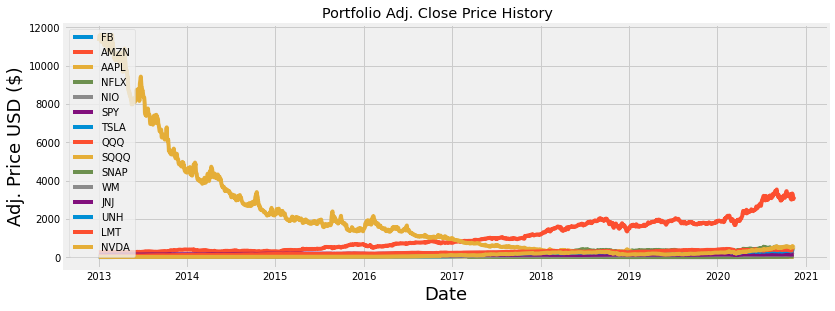

In [51]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [52]:
#Show the daily simple returns, NOTE: Formula = new_price/old_price - 1
returns = df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,NIO,SPY,TSLA,QQQ,SQQQ,SNAP,WM,JNJ,UNH,LMT,NVDA
Date,,,,,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,NaN,-0.002259,-0.016686,-0.005208,0.014990,NaN,0.003532,-0.001412,-0.046755,0.003002,0.000786
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,NaN,0.004391,-0.010641,-0.003291,0.009936,NaN,-0.000293,0.011450,0.001923,0.003741,0.032993
2013-01-07,0.022949,0.035925,-0.005882,0.033549,NaN,-0.002732,-0.001744,0.000300,-0.001861,NaN,-0.003227,-0.002096,0.000000,0.003408,-0.028897
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,NaN,-0.002877,-0.019220,-0.001951,0.005594,NaN,0.002061,0.000140,-0.013246,-0.013373,-0.021926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-05,0.025402,0.024942,0.035494,0.033826,0.123044,0.019503,0.040643,0.026071,-0.077148,-0.010479,0.031366,0.002583,-0.000451,-0.020045,0.026515
2020-11-06,-0.004310,-0.003200,-0.001136,0.001888,-0.017001,-0.000228,-0.018581,0.000747,-0.003704,0.092178,-0.003426,0.017816,-0.019582,-0.009405,0.028390
2020-11-09,-0.049896,-0.050623,-0.019968,-0.085929,0.057411,0.012566,-0.020212,-0.020434,0.061073,-0.094315,0.014085,0.026924,0.007310,0.007418,-0.063951


In [53]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,NIO,SPY,TSLA,QQQ,SQQQ,SNAP,WM,JNJ,UNH,LMT,NVDA
FB,0.119920,0.055691,0.045128,0.057143,0.096334,0.031975,0.058658,0.044235,-0.131630,0.074134,0.018984,0.018577,0.030726,0.021553,0.059114
AMZN,0.055691,0.095216,0.040191,0.064078,0.094169,0.029232,0.057555,0.042519,-0.126311,0.057516,0.015930,0.017604,0.027121,0.018683,0.056164
AAPL,0.045128,0.040191,0.082065,0.035323,0.106313,0.032699,0.050954,0.043533,-0.129142,0.053397,0.020341,0.019520,0.031963,0.023686,0.058257
NFLX,0.057143,0.064078,0.035323,0.213300,0.093383,0.030787,0.074734,0.043691,-0.129656,0.052641,0.015861,0.016295,0.030143,0.018477,0.065083
NIO,0.096334,0.094169,0.106313,0.093383,1.327664,0.070008,0.205355,0.088047,-0.259982,0.097013,0.028339,0.031930,0.068545,0.032828,0.126032
SPY,0.031975,0.029232,0.032699,0.030787,0.070008,0.028532,0.037533,0.030824,-0.091112,0.045127,0.020725,0.020156,0.029732,0.023578,0.041881
TSLA,0.058658,0.057555,0.050954,0.074734,0.205355,0.037533,0.312897,0.050316,-0.148942,0.091878,0.018413,0.017719,0.033688,0.018965,0.073641
QQQ,0.044235,0.042519,0.043533,0.043691,0.088047,0.030824,0.050316,0.038890,-0.114966,0.055927,0.019984,0.020246,0.030697,0.023320,0.054886
SQQQ,-0.131630,-0.126311,-0.129142,-0.129656,-0.259982,-0.091112,-0.148942,-0.114966,0.340896,-0.165484,-0.058921,-0.059730,-0.090455,-0.068622,-0.162323
SNAP,0.074134,0.057516,0.053397,0.052641,0.097013,0.045127,0.091878,0.055927,-0.165484,0.454410,0.025852,0.020235,0.036620,0.035333,0.104290


In [54]:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.035356193025138205

In [55]:
port_volatility = np.sqrt(port_variance)
port_volatility

0.18803242546204155

In [56]:
portfolioSimpleAnnualReturn = np.sum(returns.mean()*weights) * 252
portfolioSimpleAnnualReturn

0.34683830808968785

In [57]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 35.0%
Annual volatility/standard deviation/risk : 19.0%
Annual variance : 4.0%


In [58]:
pip install PyPortfolioOpt

In [59]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [60]:
mu = expected_returns.mean_historical_return(df)#returns.mean() * 252
S = risk_models.sample_cov(df) #Get the sample covariance matrix

In [61]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('FB', 0.04237), ('AMZN', 0.09326), ('AAPL', 0.10166), ('NFLX', 0.04583), ('NIO', 0.01669), ('SPY', 0.0), ('TSLA', 0.03275), ('QQQ', 0.09759), ('SQQQ', 0.22502), ('SNAP', 0.0), ('WM', 0.10506), ('JNJ', 0.02868), ('UNH', 0.05133), ('LMT', 0.07455), ('NVDA', 0.08523)])
Expected annual return: 15.7%
Annual volatility: 5.3%
Sharpe Ratio: 2.60


(0.1571074852887862, 0.05273170613674349, 2.6000957551655937)

In [62]:
pip install pulp

In [65]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'FB': 3, 'AMZN': 1, 'AAPL': 17, 'NFLX': 1, 'NIO': 7, 'TSLA': 1, 'QQQ': 6, 'SQQQ': 223, 'WM': 17, 'JNJ': 3, 'UNH': 3, 'LMT': 4, 'NVDA': 3}
Funds remaining: $0.73
